#  ATOC5860 Application Lab #3 - eof_analysis_cosineweightingLAST_cartopy
##### Written by Prof. Kay (CU) and Prof. Maroon (UW), with "peer-review" by Dr. Vineel Yettella (ATOC Ph.D. 2018, now at Apple)
##### last updated February 22, 2023 - works with environment atoc5860env2023clean.yml

### LEARNING GOALS:
1) Complete an EOF analysis using the two methods discussed in class: eigenanalysis of the covariance matrix, Singular Value Decomposition (SVD). Compare and make sure you get the same answer.  See how the code works to implement the matrix math in the Barnes notes.
2) Assess the statistical significance of the results, including estimmating the effective sample size (N*). (Lots more to think about here for estimating the autocorrelation and N* in data...!)
3) Provide a qualitative description of the results: What are the eigenvalue,the eigenvector, and the principal component?  What do they mean physically? What do you learn from each one about the space-time structure of the underlying dataset?
4) Assess influence of data preparation on EOF results. What is the influence of the seasonal cycle, detrending, cosine weighting, standardizing (dividing by the standard deviation), anomalizing (removing the mean), (insert your idea here)?

### DATA and UNDERLYING SCIENCE MOTIVATION:  
In this notebook, you will analyze observed monthly sea surface temperatures from HadISST (http://www.metoffice.gov.uk/hadobs/hadisst/data/download.html). The data are in netcdf format in a file called HadISST_sst.nc.  Note that this file is ~500 MB so it might take a bit of time to download.  You will subset the data to only look at the North Pacific. Depending on how you prepare your data for analysis – you might expect to see different spatial patterns (eigenvectors) and different time series (principal components).  Some things you might look for in your results are the Pacific Decadal Oscillation, “global warming”, the seasonal cycle, ….  Depending on your data preparation – your hypothesis for what you should see in your EOF analysis should change.  Note: In this dataset - land is NaN, sea ice is -999 – the notebook sets all values over land and sea ice to 0 for the EOF analysis.

### Non-exhaustive Questions to guide your analysis:  
1) **To Start - Execute all code without making any modifications.** Provide a physical interpretation for at least the first two EOFs and principal components (PC).  What do the EOFs (spatial patterns) tell you?  What do the PC time series for the EOFs tell you?  What do you think of the method for estimating the effective sample size (Nstar)?  Can you propose an alternative way to estimate Nstar?  Do you get the same results using eigenanalysis and SVD? If you got a different sign - do you think that is meaningful?

sean: 
- The first two EOFs show the dominant spatial structures of North Pacific SSTs from 1950-1016. The first EOF shows that there is a warmer tonguelike pattern of SSTs eminating from the Western North Pacific and surrounded by colder SSTs. The second EOF shows that there is general warming of SSTs accross the entire North Pacific with most warming taking place near the western coastline. These two EOFs explain much of the variance in this dataset (~20% + ~13% = ~33%). The first two principal components (PCs) are associated with the first two EOFs respectively. The principal components show how often the dataset (at each snapshot in time --> sampling dimension) looks like the corresponding EOF spatial pattern (and what factor/amplitude to multiply the pattern by --> y axis of the PCs).
- The method for estimating the effective sample size (Nstar) uses the autocorrelation to determine that the SSTs are highly correlated from one timestep to the next (like what we did last unit) --> lag1 autocorrelation from np.correlate: 0.886. I'm not sure of a better way to calculate Nstar, but in the notebook below, Jen wrote that we are "assuming all data is independent (not a great assumption, how do we do better?)" which makes me think that we shouldn't assume that all data is independent. I'm not sure how to do that yet though because isn't that what Nstar tells us???
    - Have N=809 samples, of those, N*=49 are independent of one another
- We do get the same results using eigenanalysis and SVD. However, the EOF patterns between the two are opposite. But since the PCs are also opposite from each other, the conclusion is that the results are the same (e.g. multiplying a positive EOF pattern by -1 is the same as multiplying a negative EOF pattern by +1, etc)

2) Repeat the analysis but this time do not remove the seasonal cycle.  What do you think you will see? Discus your results with your neighbor. How do the EOFs and PC change? Was removing the seasonal cycle from the data useful?  What impacts does removing the seasonal cycle have on your analysis?

sean:
- If I don't remove the seasonal cycle, I would expect that the pattern that explains the most variance would in fact be the seasonal cycle (i.e. EOF1)
- This is in fact what we see when we remove the seasonal cycle below. The first EOF exhibits general warming in the North Pacific (climate change signal) and PC1 (principal component 1) shows a clear seasonal cycle within each year (max to min each year). The first EOF also explains about 90% of the variance since the seasonal cycle pattern is so dominant compared to any other potential underlying structural patterns there are in the dataset.
- removing the seasonal cycle is not really useful since we already know that we can expect to see a climate change signal and a clear seasonal cycle for North Pacific SSTs. It can be a helpful sanity check though. It can also be useful if you don't know what the seasonal cycle of the variable is or want to understand how much variance the seasonal cycle explains.

3) Repeat the analysis but this time detrend the data.  Discus your results. How do the EOFs and PC change? Was detrending the data useful?   What impacts does detrending have on your analysis?

sean:
- not entirely sure how to detrend a 3-D dataset (pactsanomstdwgt)? probably need to flatten it? Will return to this
- but I don't think detrending the data will do much since it already looks detrended below when plotting the original and standardized data

4) Repeat the analysis but this time do not apply the cosine weighting.  Discus your results. How do the EOFs and PC change? Was cosine weighting the data useful?  What impacts does cosine weighting have on your analysis? What are examples of analyses where cosine weighting would be more/less important to do?

sean:
- It doesn't look like much changed after not applying the cosine weighting. Maybe because we are taking values from 20-70N, which is over a large area and not that far North. Cosine weighting really matters closer to the poles since we are taking the Cosine of the latitude (poles --> lat = 90 degrees --> cos(90)=0 --> more weighting when cos(lat) is closer to 0). It shouldn't matter that much near the equator (lat = 0 degrees --> cos(0)=1 --> less weighting when cos(lat) closer to 1).

5) Repeat the analysis but this time do not standardize the data (i.e., comment out dividing by standard deviation).  Discus your results. How do the EOFs and PC change? Was standardizing the data useful?  What impacts does standardizing the data have on your analysis?

sean:
- The EOFs and PCs don't change that much when not standardizing the data. The variability in EOF2 looks to be increased a bit though. Standardizing the data probably just limits the magnitude of the pattern we see.

*Note: For steps 2)-5) -- I recommend saving a copy of the notebook and renaming it.  Then you can compare notebooks to assess the influence of the proposed analysis variants.*


## A reminder of the EOF/PCA Analysis Recipe – 5 steps

1) Prepare your data for analysis. What you need to do depends on your data, and on your goals for the EOF analysis. Examples of data prep steps include: a) sub-setting the global data to a smaller domain, b) subtract the mean, c) remove the seasonal or diurnal cycle, d) detrend the data, e) standardizing the data (divide by the standard deviation), f) remove NaN – EOF analysis does not work with missing data, g) cosine weight the data i.e., weight your data by the cosine of latitude to account for the decrease in grid-box area as one approaches the pole.  COSINE WEIGHT SHOULD BE DONE LAST.

2) Calculate the EOFs and PCs using either or both methods: a) Eigenanalysis of the covariance matrix, b) Singular Value Decomposition (SVD).

3) Plot the first 10 eigenvalues (scaled as the percent variance explained) in order of variance explained.  Add error bars following North et al. 1982.  Describe how you determined the effective degrees of freedom N*. How many statistically significant EOFs are there? 

4) Plot EOF patterns and PC timeseries (usually just the first three or so unless you want to look at more). 

5) Regress the data (unweighted data if applicable) onto standardize values of the 3 leading PCs.  In other words, project the standardized principal component onto the original anomaly data X to get the EOF in physical units.  You should have one regression pattern for each PC – i.e., the EOF pattern associated with a 1 standard deviation anomaly of the PC.  Note: The resulting patterns will be similar to the EOFs but not identical. 

In [1]:
### GENERAL SETUP
%matplotlib inline  
# this enables plotting within notebook

#import modules
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import numpy.linalg as LA
from matplotlib.gridspec import GridSpec
import timeit
import cartopy.crs as ccrs
import datetime
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 

In [2]:
### Read in the data
#load HadISST data - Data from http://www.metoffice.gov.uk/hadobs/hadisst/data/download.html.  
filename='HadISST_sst.nc'
ds=xr.open_dataset(filename,decode_times=True)
print(ds['time'])

<xarray.DataArray 'time' (time: 1769)>
array(['1870-01-16T11:59:59.505615234', '1870-02-14T23:59:59.340820312',
       '1870-03-16T11:59:59.340820312', ..., '2017-03-16T12:00:00.000000000',
       '2017-04-16T12:00:00.000000000', '2017-05-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2017-05-...
Attributes:
    long_name:      Time
    standard_name:  time


In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 1769, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2017-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    7/7/2017 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [4]:
### STEP #1 - PREPARE YOUR DATA FOR ANALYSIS

#Shift the dataset by 180 degrees to get indices for Pacific basin to be monotonically increasing
dsshift=ds.roll(longitude=180,roll_coords=True)
#dsshift2=dsshift
shiftedlon=dsshift['longitude'].values
shiftedlon[dsshift['longitude'].values<0]=dsshift['longitude'].values[dsshift['longitude'].values<0]+360
#print(shiftedlon)
dsshift.coords['longitude']=('longitude',shiftedlon)
#print(dsshift['longitude'])
lon=dsshift['longitude'].sel(longitude=slice(108,-101+360))
lat=dsshift['latitude'].sel(latitude=slice(68,20))
#time1=datetime.date(1980,1,1)
time1=datetime.date(1950,1,1)
time2=datetime.date(2017,1,1)
time=dsshift['time']

#Select only Northern Pacific temperature from 20N-70N, 108E to 101W  101+360
pacts=dsshift['sst'].sel(latitude=slice(68,20)).sel(longitude=slice(108,-101+360)) #latitude is reversed
pacts=pacts.sel(time=slice(time1,time2))
time=time.sel(time=slice(time1,time2))
print(np.shape(time))
print(np.shape(pacts))

#Set points with sea ice equal to nans so that they are not included in averaging.
nanhelp=pacts.values
#print(nanhelp[0,:,:])
#plt.contourf(nanhelp[0,:,:])
#plt.colorbar()
foo=np.where((nanhelp<=-100)|(np.isnan(nanhelp))) ## note this gives a warning because nanhelp already has nans in it (over land)
nanhelp[foo]=np.nan;  ## pull out sea ice (set at -999)
nans=np.empty(np.shape(pacts))
nans[0:len(time),:,:]=np.nansum(np.isnan(nanhelp),axis=0)[None,:,:]  ## in the time axis (axis=0) - find any times with sea ice
pacts.values[nans>0]=np.nan   ## None is the time axis dummy.  broadcasts across the dimensions.  

(804,)
(804, 48, 151)


In [5]:
### STEP #1 - PREPARE YOUR DATA FOR ANALYSIS (continued)

### Check dimesions of time and pactsanom after subsetting
## Time should be (804)  pacts should be (804,48,151)
print(f'shape of time dimension: {np.shape(time)}')
print(f'shape of pacts - should be (804,48,151): {np.shape(pacts)}')

shape of time dimension: (804,)
shape of pacts - should be (804,48,151): (804, 48, 151)


In [6]:
time

<xarray.DataArray 'time' (time: 804)>
array(['1950-01-16T12:00:00.000000000', '1950-02-15T00:00:00.000000000',
       '1950-03-16T12:00:00.000000000', ..., '2016-10-16T12:00:00.000000000',
       '2016-11-16T12:00:00.000000000', '2016-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16T12:00:00 ... 2016-12-16T12:00:00
Attributes:
    long_name:      Time
    standard_name:  time

In [7]:
### STEP #1 - PREPARE YOUR DATA FOR ANALYSIS (continued)

# Take anomalies - subtract the mean (keep by default)
pactsanom=pacts-pacts.mean('time');

# Remove the seasonal cycle (keep by default)
# sean: comment out these lines below for step 2 (don't remove the seasonal cycle and see what happens to EOF analysis)
climo=pactsanom.groupby('time.month').mean('time')
pactsanom=pactsanom.groupby('time.month')-climo
print(f'shape of pactsanom - should be (804,48,151): {np.shape(pactsanom)}')
#print(pactsanom)

# Remove the linear trend (comment out by default)
#time1=np.arange(1,len(time)+1,1)
#print(np.shape(time1))
## calculate the slope a1 using Barnes Equation (14)
#a1=np.dot(time1-time1.mean(),np.swapaxes(pactswgtanom.values,0,1))/np.dot(time1-time1.mean(),time1-time1.mean());
#print(np.shape(a1))
#a1_broadcast=a1[None,:,:]*time1[:,None,None]
#print(np.shape(a1_broadcast))
#pactswgtanom.values=pactswgtanom.values-a1_broadcast;

# Standardize your data - divide by the standard deviation (keep by default)
# sean: step5 --> don't standardize data --> comment line below
# pactsanomstd=pactsanom/(pactsanom.std('time'));
pactsanomstd=pactsanom

shape of pactsanom - should be (804,48,151): (804, 48, 151)


In [8]:
# climo = pactsanom.groupby('time.month')#.mean('time')
# climo

In [9]:
## Cosine weighting following Hannachi et al. 2007 page 1123, not Barnes.
## we found that the SVD and eigenanalysis give same results when you weight the data matrix by sqrt(cosine(lat))
#print(lat)
# sean: step4 --> remove cosine weighting by commenting out line below and replace it
pactsanomstdwgt=pactsanomstd*np.sqrt(np.cos(lat*np.pi/180))
# pactsanomstdwgt=pactsanomstd
print(f'shape of pactsanomstdwgt - should be (804,48,151): {np.shape(pactsanomstdwgt)}')

shape of pactsanomstdwgt - should be (804,48,151): (804, 48, 151)


In [10]:
# Remove missing values, i.e., set nans = 0 (EOF analysis fails with nan!)
# setting to 0 when you are working with anomalies is equivalent to setting the value to the mean value, a decent assumption
pactsanomstdwgt.values[np.isnan(pactsanomstdwgt.values)]=0.0;
pactsanomstdwgt.values[np.isnan(pactsanomstdwgt.values)]=0.0;

In [11]:
# time
pactsanomstdwgt

<xarray.DataArray (time: 804, latitude: 48, longitude: 151)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.48465583, 0.38681653, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.69167686, 0.44209382, 0.35472998, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.32451972, 0.2829822 , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.253726  , 0.1316387 , 0.18697013, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.5229431 , 0.36021268, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.49634102, 0.18969063, 0.03934055, ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2016-12-16T12:00:00
  * latitude   (latitude) float32 67.5 66.5 65.5 64.5 ... 23.5 22.5 21.5 20.5
  * longitude  (longitude) float32 108.5 109.5 110.5 111.5 ... 256.5 257.5 258.5
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [12]:
# sean: step3 --> detrend the data
# detrend data

# P_avg=data['P_hPa'].mean()





# years = data['YEAR']
# GTS_anomaly = data['GTS_anomaly']
# # print(GTS_anomaly.mean())

# time=np.array(range(len(years)))

# slope, intercept, r_value, p_value, std_err = stats.linregress(years,GTS_anomaly-GTS_anomaly.mean())
# GTS_anomaly_dtrend=GTS_anomaly-(years*slope+intercept)

# plt.plot(years,GTS_anomaly_dtrend,color='black')
# plt.plot(years,GTS_anomaly,color='red')


# pactsanomstdwgt
# time

# slope, intercept, r_value, p_value, std_err = stats.linregress(time,pactsanomstdwgt)





In [13]:
### STEP #1 - PREPARE YOUR DATA FOR ANALYSIS (continued)
### At the end of this first step you want two matrices ready for EOF analysis
### Y_stand = standardized data, dimensioned (time,location)
### Y = original data, dimensioned (time,location)
### everything below in the code assumes that you have Y_stand, Y defined as above

#flatten the lat,lon in the array so that you have an array dimensioned (time,location)
a,b,c=np.shape(pactsanomstdwgt.values)  ## have axis sizes for later (a, b, c)
Y_stand=pactsanomstdwgt.values.reshape(a,b*c);
Y=pactsanom.values.reshape(a,b*c);  ## just the anomaly - you'll need this later for step 5(physical units)
print(a,b,c)
print(np.shape(Y_stand))
print(np.shape(Y))

804 48 151
(804, 7248)
(804, 7248)


In [14]:
pactsanomstdwgt

<xarray.DataArray (time: 804, latitude: 48, longitude: 151)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.48465583, 0.38681653, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.69167686, 0.44209382, 0.35472998, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.32451972, 0.2829822 , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.253726  , 0.1316387 , 0.18697013, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.5229431 , 0.36021268, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.49634102, 0.18969063, 0.03934055, ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2016-12-16T12:00:00
  * latitude   (latitude) float32 67.5 66.5 65.5 64.5 ... 23.5 22.5 21.5 20.5
  * longitude  (longitude) float32 108.5 109.5 110.5 111.5 ... 256.5 257.5 258.5
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

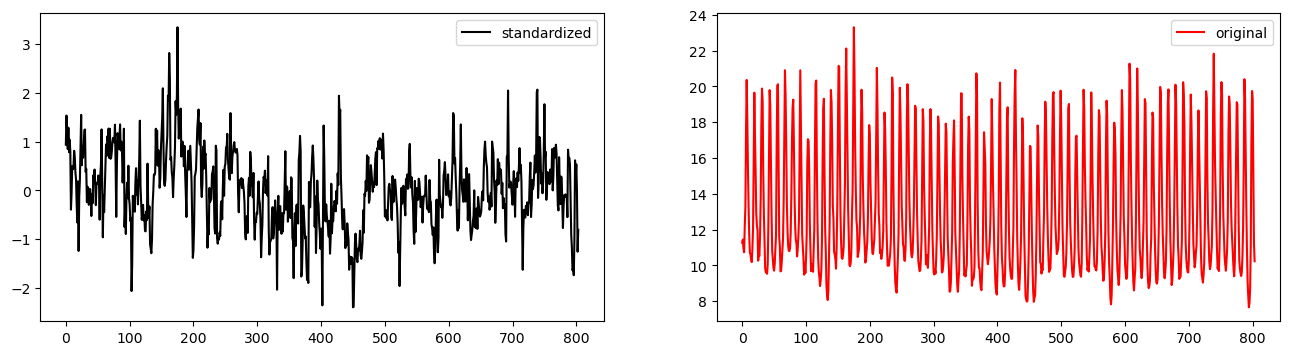

In [15]:
#plot the standardized and original time series for one location -- Look at your data!!
f=plt.figure(figsize=(16,4))
gs=GridSpec(1,2)
plt.subplot(gs[0,0]);
plt.plot(Y_stand[:,4012],label='standardized',color='black');
plt.legend();
plt.subplot(gs[0,1]);
plt.plot(pacts.values.reshape(a,b*c)[:,4012],label='original',color='red');
plt.legend();

In [16]:
print('spot check of Y_stand at one location:')
print(Y_stand[0:100,4012])

spot check of Y_stand at one location:
[ 0.93494695  1.53329     1.1852266   0.84648037  1.2841744   0.7814612
  1.0370598   0.79583615 -0.39714888 -0.05256224  0.4949653   0.43209606
  0.46761316  0.8096357   0.682524    0.3704905   0.21824455 -0.3111962
 -0.6623925   0.18248647 -1.2439616  -0.12325597  0.2076453   0.9198692
  1.5460353   0.5137149   0.90120536  0.6673373   0.9045791   1.2348337
  1.2472452   0.38083827  0.4403442  -0.243699    0.07263929  0.04871413
 -0.29767752 -0.04805242  0.02523615 -0.19391875 -0.5270467  -0.07271682
 -0.2647563   0.30574307  0.2011765   0.42545465  0.14657904 -0.30390525
  0.11971963  0.15648276  0.12935743  0.3031575   0.14170913 -0.60288966
  0.29917425  0.5253306   1.2486371   0.11500472 -0.96478534 -0.10608826
 -0.44956648  0.03692201  0.5694239   0.9408116   0.7054234   1.1069139
  1.0071448   1.266506    0.66278416  1.2613186   0.6452243   0.66521907
  0.7905289   0.99213123  1.0757794   1.0560772   0.9824119   1.3450674
  0.5271604  -0.54

In [17]:
### STEP #2 - Calculate the EOFs -- Using eigenanalysis of the covariance matrix (the np.linalg.eig method)

#calculate covariance matrix
C = 1./np.size(Y_stand,axis = 0)*np.dot(np.transpose(Y_stand),Y_stand) ## Barnes Chapter 3 Equation 7
print(np.shape(Y_stand))
print(np.shape(C))

#get eigenvalues and eigenvectors - linear algebra module method - will take a couple of minutes
start_time = timeit.default_timer()
lam, E = LA.eig(C) ## Barnes Chapter 3 Equation 42
elapsed = timeit.default_timer() - start_time
print('Time elapsed in LA eigenvalue method: ',elapsed, 'seconds')

#order by eigenvalues and eigenvectors by eigenvalues
ii=np.flipud(np.argsort(lam))
lam=lam[ii]
E=E[:,ii]

(804, 7248)
(7248, 7248)
Time elapsed in LA eigenvalue method:  76.44436051603407 seconds


In [18]:
### STEP #2 - Calculate the EOFs -- Using Singular Value Decomposition (SVD) (the np.linalg SVD method)
### Why is this method so much faster?  Ah, an unsolved mysteries of ATOC5860...
start_time = timeit.default_timer()
u,s,v=LA.svd(Y_stand)  ## Barnes Chapter 3 Equation (65)
elapsed = timeit.default_timer() - start_time
print('Time elapsed in LA SVD method: ',elapsed,' seconds')

Time elapsed in LA SVD method:  2.88060197501909  seconds


804
(804,)
lag1 autocorrelation from np.correlate: 0.883


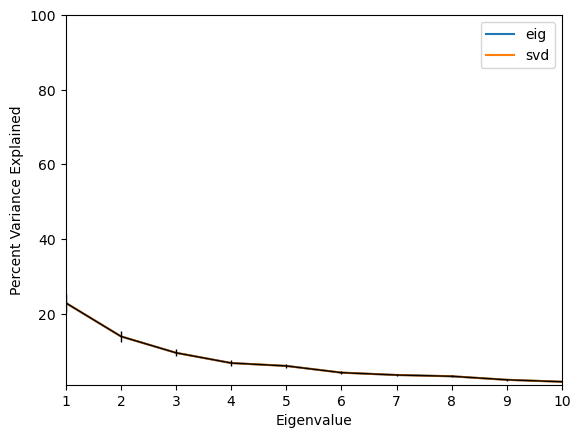

In [19]:
### STEP #3 - Plot the eigenvalues from both methods including errors bars following North et al. 1982.

# convert eigenvalues to percent variance explained
pve = 100.*np.abs(lam)/np.sum(np.abs(lam))
pve2 = 100.*np.abs(s**2)/np.sum(np.abs(s**2))
##print(pve2[0:10]-pve[0:10])

f=plt.figure()
plt.plot(np.arange(1,len(pve)+1),pve,label='eig');
plt.plot(np.arange(1,len(pve2)+1),pve2,label='svd')
plt.ylim([1,100])
plt.xlim([1,10])
plt.ylabel('Percent Variance Explained')
plt.xlabel('Eigenvalue')
plt.legend()

Nstar = np.size(Y_stand,axis = 0) ## assume all data is independent (not a great assumption, how do we do better?)
print(Nstar)
###  could for example - find the effective sample size using the average of all data
###  Caution: Use the data that went into the EOF analysis for this calculation, not the original data...
tseries=np.nanmean(np.nanmean(pactsanomstdwgt,axis=2),axis=1)  ## warning from land nans, ignore it!
print(np.shape(tseries))
sigma=np.std(tseries)  ## calculate the standard deviation
mean=np.mean(tseries)  ## calculate the mean
N=len(tseries)         ## calculate the length of the timeseries
lag=1
t1_m=tseries[0:-1*lag]-mean
t2_m=tseries[lag:]-mean
alpha=np.correlate(t1_m,t2_m,mode='valid')/(N-lag)/(sigma**2)
print('lag1 autocorrelation from np.correlate:',round(alpha[0],3))
### Calculate the effective sample size (Nstar) for this data
### To estimate the number of independent samples - use Chapter 2 Barnes Eq. 88
Nstar=np.round((1-alpha)/(1+alpha)*N,0)
eb = pve*np.sqrt(2./Nstar)  ## North 1982, Barnes Chapter 3 Equation 80
plt.errorbar(np.arange(1,np.size(pve)+1.),pve,yerr = eb/2, xerr = None, linewidth = 1, color = 'black');

In [21]:
Nstar

array([49.], dtype=float32)

In [22]:
### STEP 4 - Plot the first EOF pattern and PC timeseries 

# select an EOF
eof_num=1

# Find the eigenvector (e1) associated with "eof_num" from the eigenanalysis method
e1 = E[:,eof_num-1]
print(f'shape of e1 {np.shape(e1)}')

# Calculate the principal component (z1) associated with "eof_num" from the eigenanalysis method
z1 = np.dot(Y_stand,e1)  ## Barnes Chapter 3 Eq. (50)
## standardize it
z1 = (z1-np.mean(z1))/np.std(z1)  
print(f'shape of z1: {np.shape(z1)}')

# Find the eigenvector (e1_svd) associated with "eof_num" from the SVD method
##print(np.shape(v),np.shape(s),np.shape(u))  ## uncomment to check the shapes of SVD output
e1_svd = (v[eof_num-1,:])
print(f'shape of e1_svd {np.shape(e1_svd)}')

# Calculate the principal component (z1_svd) associated with "eof_num" from the SVD method
z1_svd = u[:,eof_num-1]  ##*(s[eof_num-1]) deleted
## standardize it
z1_svd = (z1_svd-np.mean(z1_svd))/np.std(z1_svd)  
print(f'shape of z1_svd: {np.shape(z1_svd)}')

shape of e1 (7248,)
shape of z1: (804,)
shape of e1_svd (7248,)
shape of z1_svd: (804,)


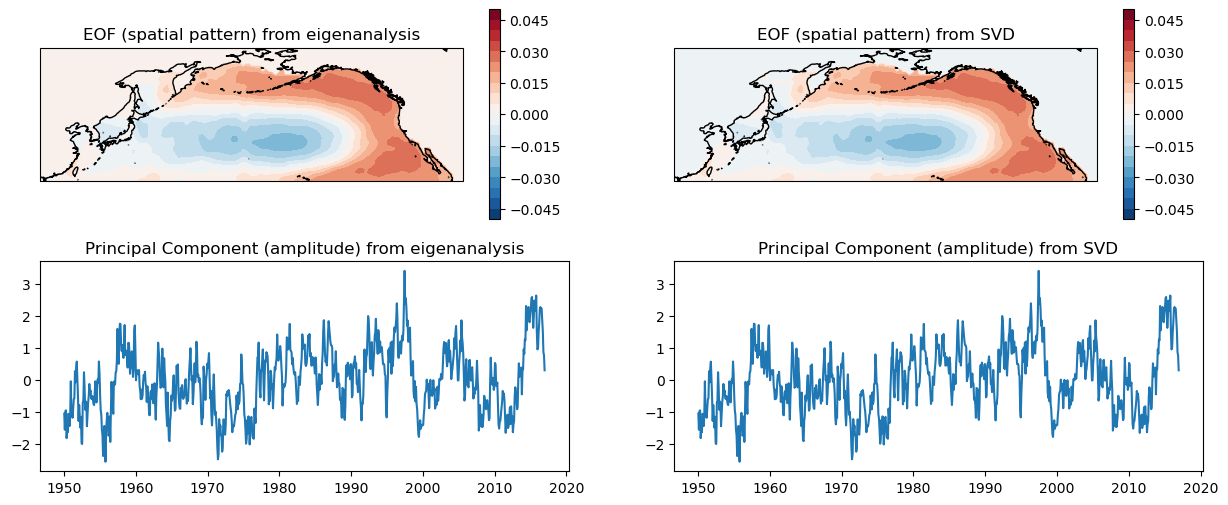

In [23]:
### Make a 4-panel plot showing the eigenvector (spatial pattern) and principal component (amplitude)

f=plt.figure(figsize=(15,6))
gs=GridSpec(2,2)

ax=plt.subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180))
#levels=np.arange(-0.1,0.11,0.01)
levels=np.arange(-0.05,0.051,0.005)
CS=ax.contourf(lon,lat,e1.reshape(b,c),levels,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())
ax.set_extent([lon[0],lon[-1],lat[0],lat[-1]],ccrs.PlateCarree())
ax.coastlines()
plt.title('EOF (spatial pattern) from eigenanalysis')
plt.colorbar(CS)
plt.subplot(gs[1,0])
plt.plot(time,(z1))
plt.title('Principal Component (amplitude) from eigenanalysis')
##plt.xlim([0,900])  ## when the first EOF is the seasonal cycle
ax=plt.subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180))
levels=levels+1e-14 ### cartopy weirdness not explained but at least it makes plots :)
CS=ax.contourf(lon,lat,np.real(e1_svd).reshape(b,c),levels,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())
ax.set_extent([lon[0],lon[-1],lat[0],lat[-1]],ccrs.PlateCarree())
ax.coastlines()
plt.title('EOF (spatial pattern) from SVD')
plt.colorbar(CS)
plt.subplot(gs[1,1])
plt.plot(time,(z1_svd))
plt.title('Principal Component (amplitude) from SVD');

In [24]:
print(lon.shape)
print(lat.shape)
print(e1.shape)
print(e1.reshape(b,c).shape)

(151,)
(48,)
(7248,)
(48, 151)


In [25]:
### STEP 5) Regress the data (unweighted data if applicable) onto standardize values of the PC 
### for eof_num above
      
# calculate d (EOF in physical units) for plotting
## d1 is in physical units (in this case degrees)  and denotes the anomaly associated with 1 standard deviation
## of z1 (principal component, time variation in this case)
d1 = (1./np.size(Y,axis=0))*np.dot(np.transpose(z1),Y)  ## Barnes Chapter 3 Equation (79)
#print(np.shape(d1))
d1plot = d1.reshape(b,c)  ### this is the reshaped eigenvector to plot
#print(np.shape(d1splot))

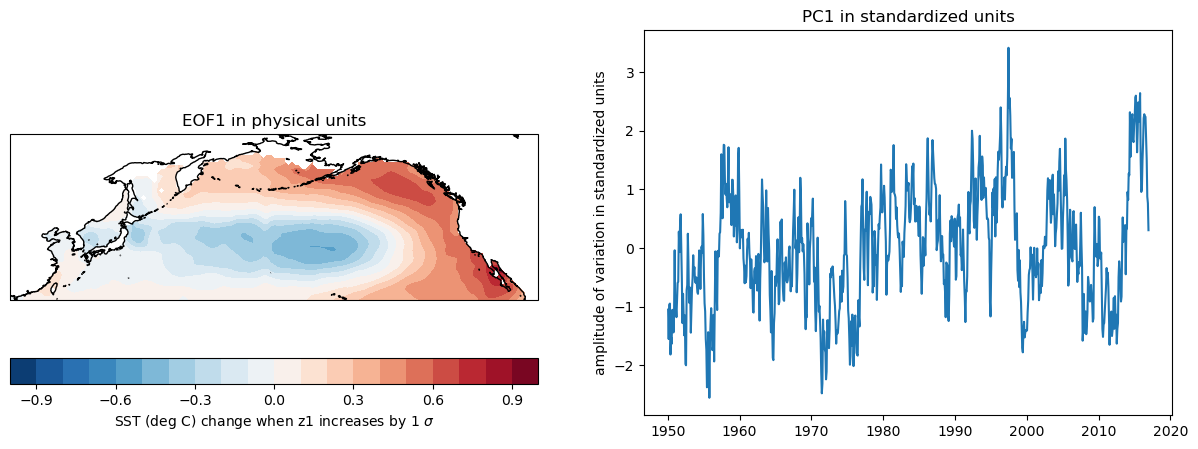

In [26]:
### Make a plot of the EOF in physical units and associated PC
f=plt.figure(figsize=(15,5))
gs=GridSpec(1,2)
levels2=np.arange(-1,1.1,0.1)
levels2=levels2+1e-14 ### +1e-14 to deal with cartopy weirdness again
ax=plt.subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180))
CS=ax.contourf(lon,lat,d1plot,levels2,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())
ax.coastlines()
cb=plt.colorbar(CS,orientation='horizontal')
cb.set_label('SST (deg C) change when z1 increases by 1 $\sigma$')
plt.title('EOF1 in physical units')
plt.subplot(gs[0,1])
plt.plot(time,z1)
plt.ylabel('amplitude of variation in standardized units');
plt.title('PC1 in standardized units');

shape of e1 (7248,)
shape of z1 (804,)
shape of e1_svd (7248,)
shape of z1_svd (804,)
(151, 48)


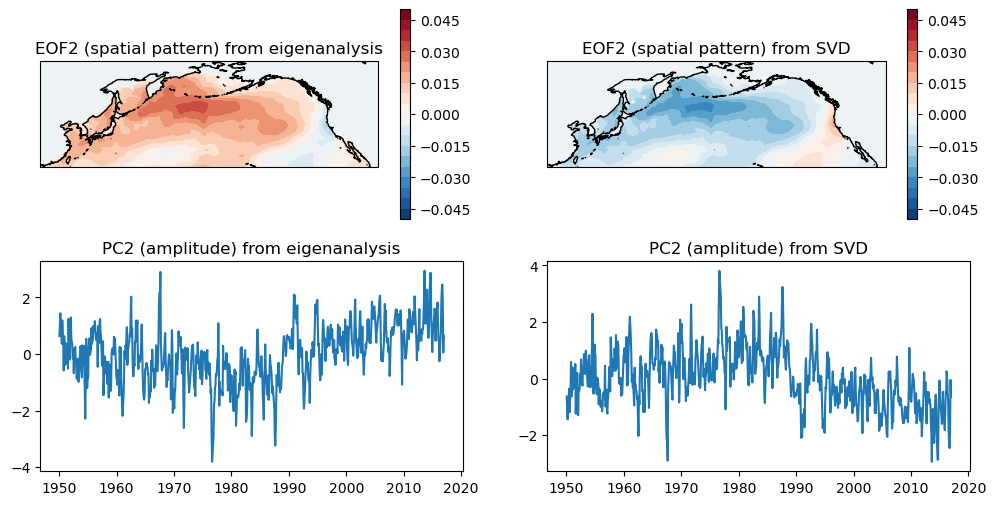

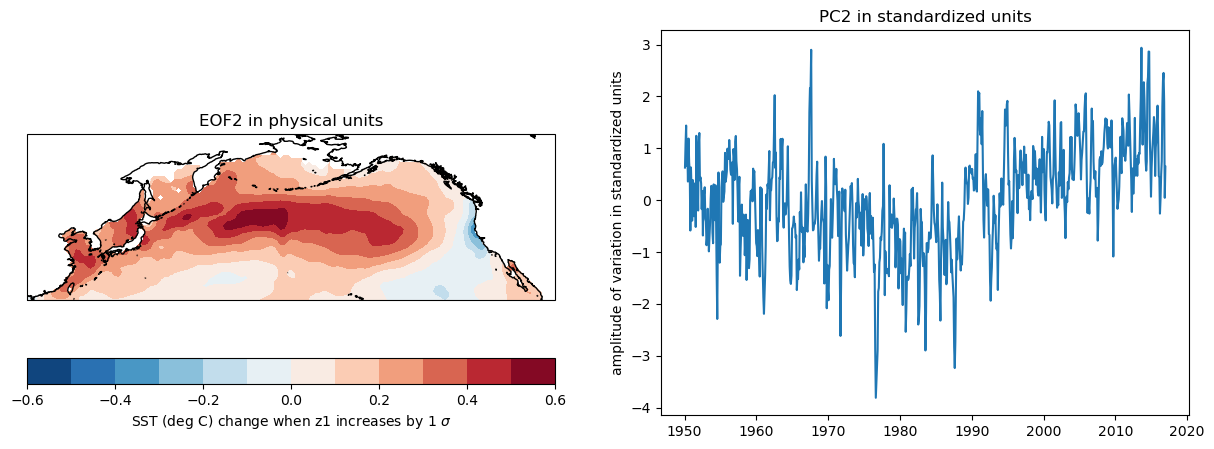

In [27]:
### Repeat STEP 4 and 5 for the second EOF  

#let's look at second eof
eof_num=2

# Find the eigenvector (e1) associated with "eof_num" from the eigenanalysis method
e1 = E[:,eof_num-1]
print(f'shape of e1 {np.shape(e1)}')

# Calculate the principal component (z1) associated with "eof_num" from the eigenanalysis method
z1 = np.dot(Y_stand,e1)  ## Barnes Chapter 3 Eq. (50)
## standardize it
z1 = (z1-np.mean(z1))/np.std(z1)  
print(f'shape of z1 {np.shape(z1)}')

# Find the eigenvector (e1_svd) associated with "eof_num" from the SVD method
##print(np.shape(v),np.shape(s),np.shape(u))
e1_svd = (v[eof_num-1,:]) ## reshape below -- removed .reshape(b,c)
print(f'shape of e1_svd {np.shape(e1_svd)}')

# Calculate the principal component (z1_svd) associated with "eof_num" from the SVD method
z1_svd = u[:,eof_num-1]  ##removed *(s[eof_num-1])
## standardize it
z1_svd = (z1_svd-np.mean(z1_svd))/np.std(z1_svd)  
print(f'shape of z1_svd {np.shape(z1_svd)}')

### Make a 4-panel plot showing the eigenvector (spatial pattern) and principal component (amplitude)

f=plt.figure(figsize=(12,6))
gs=GridSpec(2,2)
ax=plt.subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180))
#levels=np.arange(-0.1,0.11,0.01)
levels=np.arange(-0.05,0.051,0.005)
levels=levels+1e-14 ##cartopy weirdness
CS=ax.contourf(lon,lat,e1.reshape(b,c),levels,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('EOF2 (spatial pattern) from eigenanalysis');
plt.colorbar(CS)
plt.subplot(gs[1,0])
plt.plot(time,(z1))
plt.title('PC2 (amplitude) from eigenanalysis');
#plt.xlim([0,900])  ## when the first EOF is the seasonal cycle
ax=plt.subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=180))
CS=ax.contourf(lon,lat,e1_svd.reshape(b,c),levels,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('EOF2 (spatial pattern) from SVD');
plt.colorbar(CS)
plt.subplot(gs[1,1])
plt.plot(time,(z1_svd))
plt.title('PC2 (amplitude) from SVD');

# calculate d for plotting in physical units, not standardized/weighted units.
## d1 is in physical units (in this case degrees) and denotes the anomaly associated with 1 standard deviation
## of z1 (principal component, time variation in this case)

# calculate d for plotting in standardized/weighted units
## d1 denotes the anomaly (in units degrees) associated with variation in 1 unit standard deviation of PC
## of z1 (principal component, time variation in this case)
d1 = (1./np.size(Y,axis=0))*np.dot(np.transpose(z1),Y)  ## Barnes Chapter 3 Equation (79)
#print(np.shape(d1))
d1plot = d1.reshape(b,c)  ### this is the reshaped eigenvector to plot
#print(np.shape(d1splot))

f=plt.figure(figsize=(15,5))
gs=GridSpec(1,2)
levels2=np.arange(-0.6,0.61,0.1)
ax=plt.subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=180))
print(np.shape(np.transpose(d1.reshape(b,c))))
CS=ax.contourf(lon,lat,d1plot,levels2,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())
ax.coastlines()
#CS=m.contourf(x,y,d1plot,levels2,cmap=plt.cm.RdBu_r)
#m.drawcoastlines()
cb=plt.colorbar(CS,orientation='horizontal')
cb.set_label('SST (deg C) change when z1 increases by 1 $\sigma$')
plt.title('EOF2 in physical units')

plt.subplot(gs[0,1])
plt.plot(time,z1)
plt.ylabel('amplitude of variation in standardized units');
plt.title('PC2 in standardized units');

##### 